## HOUSE PRICE PREDICTION

### GROUP 14

* SETHU SURYA TEJA PAGOLU - 002122149
* RAJESH KAIREDDY - 002198556
* PRANAV SHAILESH ADHAV - 001519666

<center>
<img src="ipynb.images/start.gif" width=800 />
</center>

### WHAT IS OUR DATASET?

We took <b> Ames Housing dataset </b> which was compiled by <b>Dean De Cock</b>.
It has around 81 columns and is more extensive compared to popularly known housing datasets.

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview


### OUR HYPOTHESIS!!

<br>
Sale price of the house is more dependant on <b>Living area per sq feet, Garage area, Total Basement sqft area than the Neighbourhood</b>.
<br>

In [1]:
# IMPORTING REQUIRED LIBRARIES
import numpy as np 
import pandas as pd
from math import sqrt
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

In [2]:
# importing train.csv into pandas data frame
df = pd.read_csv("data/train.csv")

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
# UNDERSTANDING THE COLUMNS

# SalePrice - the property's sale price in dollars. This is the target variable that we're trying to predict. OUR Y!!


# ----------------------------------- WE NEED TO CHOOSE OUR X's FROM BELOW-------------------------------------------------------------
# MSSubClass: The building class
# MSZoning: The general zoning classification 
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# Street: Type of road access
# Alley: Type of alley access
# LotShape: General shape of property
# LandContour: Flatness of the property
# Utilities: Type of utilities available
# LotConfig: Lot configuration
# LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to main road or railroad
# Condition2: Proximity to main road or railroad (if a second is present)
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# OverallQual: Overall material and finish quality
# OverallCond: Overall condition rating
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet
# ExterQual: Exterior material quality
# ExterCond: Present condition of the material on the exterior
# Foundation: Type of foundation
# BsmtQual: Height of the basement
# BsmtCond: General condition of the basement
# BsmtExposure: Walkout or garden level basement walls
# BsmtFinType1: Quality of basement finished area
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Quality of second finished area (if present)
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# Heating: Type of heating
# HeatingQC: Heating quality and condition
# CentralAir: Central air conditioning
# Electrical: Electrical system
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# Bedroom: Number of bedrooms above basement level
# Kitchen: Number of kitchens
# KitchenQual: Kitchen quality
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Functional: Home functionality rating
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality
# GarageType: Garage location
# GarageYrBlt: Year garage was built
# GarageFinish: Interior finish of the garage
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageQual: Garage quality
# GarageCond: Garage condition
# PavedDrive: Paved driveway
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# PoolQC: Pool quality
# Fence: Fence quality
# MiscFeature: Miscellaneous feature not covered in other categories
# MiscVal: $Value of miscellaneous feature
# MoSold: Month Sold
# YrSold: Year Sold
# SaleType: Type of sale
# SaleCondition: Condition of sale

### we want to see how our pricing data is distributed

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

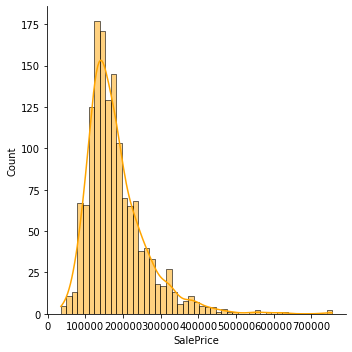

In [6]:
sns.displot(df['SalePrice'], kde=True, color='orange');

We can observe that there is peak in our saleprice data and it is also having some positive skew

In [7]:
# calculating the skew
df['SalePrice'].skew()

1.8828757597682129

In [8]:
# reducing skewedness by applying log
df['SalePrice'] = np.log(df['SalePrice'])

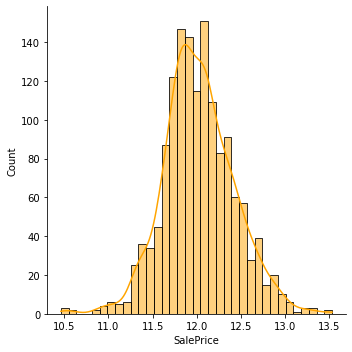

In [9]:
sns.displot(df['SalePrice'], kde=True, color='orange');

In [10]:
df['SalePrice'].skew()

0.12133506220520406

In [11]:
# Print the each column's unique values to see how are they varying and we can drop a column if it has only one value
for i in df.columns:
    print(i+': ')
    print(df[i].unique())

Id: 
[   1    2    3 ... 1458 1459 1460]
MSSubClass: 
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning: 
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage: 
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea: 
[ 8450  9600 11250 ... 17217 13175  9717]
Street: 
['Pave' 'Grvl']
Alley: 
[nan 'Grvl' 'Pave']
LotShape: 
['Reg' 'IR1' 'IR2' 'IR3']
LandContour: 
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: 
['AllPub' 'NoSeWa']
LotConfig: 
['Inside' 'FR2' 'Corner' 'CulDSac' 'F

In [12]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
df['LotFrontage'].fillna(value=0, inplace=True)

In [14]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [15]:
# filtering out numerical columns and observing the relation with salesprice
df_numeric = df.select_dtypes(include = [np.number])
df_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
# checking correlation between numeric columns
corr = df_numeric.corr()
print ('Correlation Features with SalePrice:'), print (corr['SalePrice'].sort_values(ascending = False), '\n')


# forming cols_to_remove because of less correlation with saleprice
cols_to_remove = []
for i in corr['SalePrice'].keys():
    if corr['SalePrice'][i] < 0:
        cols_to_remove.append(i)

cols_to_remove.append('GarageYrBlt')
        
print(cols_to_remove)

Correlation Features with SalePrice:
SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
LotFrontage      0.179303
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
E

* we need to drop the negative co-related values w.r.t saleprice

    ### df.drop(columns=cols_to_remove, inplace=True)

In [1]:
# dropping numeric irrelavant columns
df.drop(columns=cols_to_remove, inplace=True)

NameError: name 'df' is not defined

In [18]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,NaN,NaN,2,WD,Normal,12.247694
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,NaN,NaN,5,WD,Normal,12.109011
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,NaN,NaN,9,WD,Normal,12.317167
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,NaN,NaN,2,WD,Abnorml,11.849398
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,NaN,NaN,12,WD,Normal,12.429216


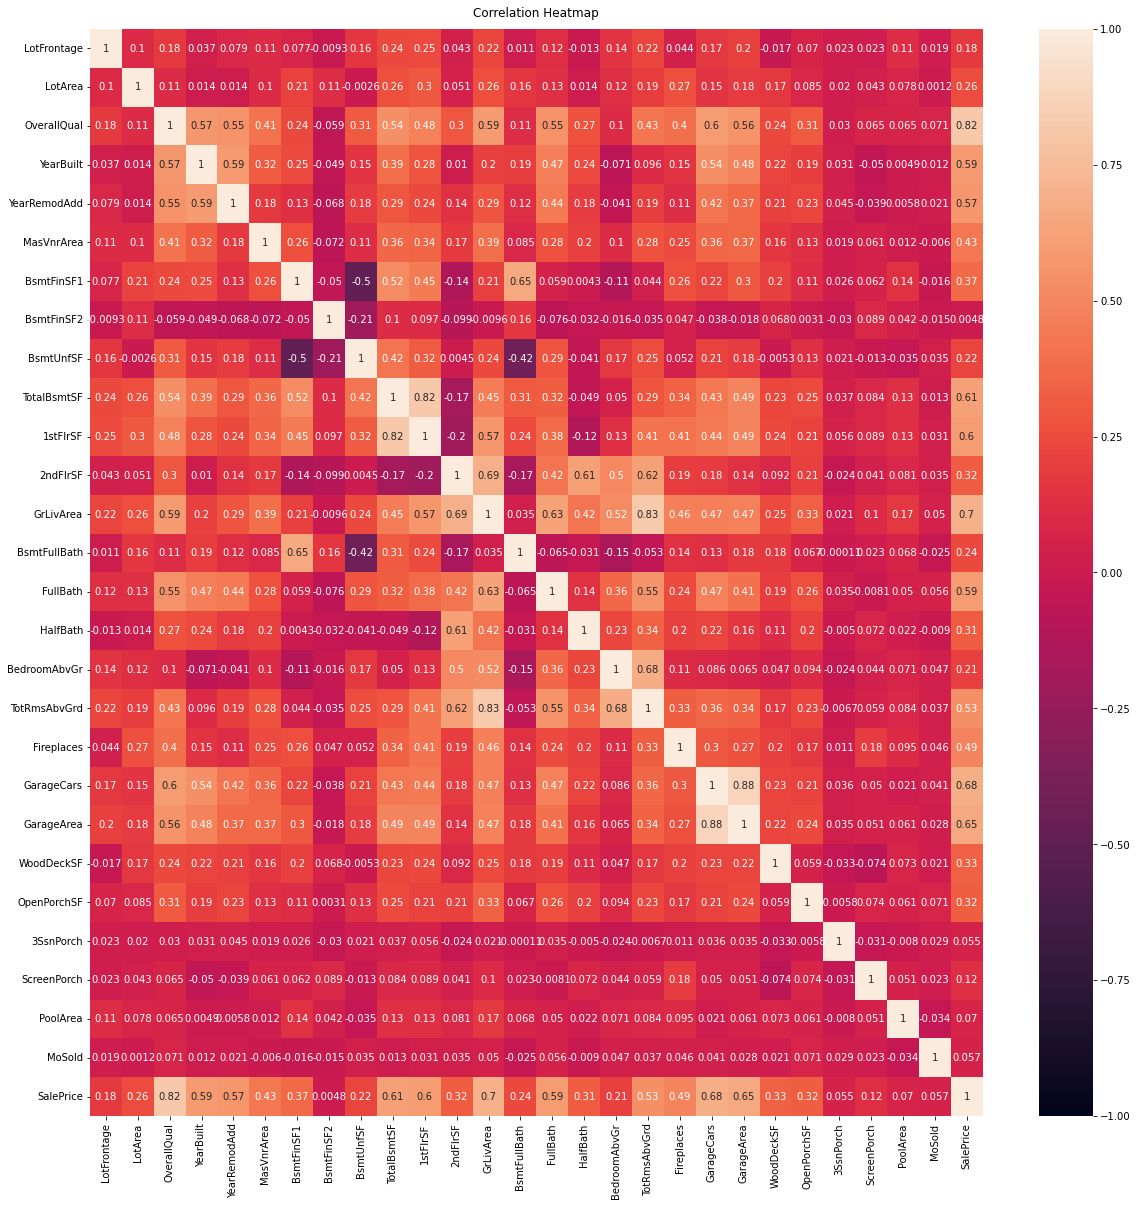

In [19]:
# sns.heatmap(df.corr());
# Increase the size of the heatmap.
plt.figure(figsize=(20,20))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Label encoding

* As we can see lot of variables are categorical, so we can label encode them and do the above steps to find the correlation

In [20]:
# importing required functions
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
# encode categorical variables
le = preprocessing.LabelEncoder()
cat_cols = []

for name in df.columns:
    if df[name].dtypes == 'O':
        cat_cols.append(name)
        df[name] = df[name].astype(str)
        le.fit(df[name])
        df[name] = le.transform(df[name])

In [22]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,2,3,3,0,4,0,...,0,0,0,3,4,4,2,8,4,12.247694
1,3,80.0,9600,1,2,3,3,0,2,0,...,0,0,0,3,4,4,5,8,4,12.109011
2,3,68.0,11250,1,2,0,3,0,4,0,...,0,0,0,3,4,4,9,8,4,12.317167
3,3,60.0,9550,1,2,0,3,0,0,0,...,0,0,0,3,4,4,2,8,0,11.849398
4,3,84.0,14260,1,2,0,3,0,2,0,...,0,0,0,3,4,4,12,8,4,12.429216


In [23]:
# Just in case if there are any null/na values
df.isna().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
                ..
MiscFeature      0
MoSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 71, dtype: int64

In [24]:
# filling na with mean
df = df.fillna(df.mean())

### we shall take co-relations once again

In [25]:
# checking correlation between numeric columns
corr2 = df.corr() # we are not afraid, as all the columns are currently numerical (we encoded strings)
print ('Correlation Features with SalePrice:'), print (corr2['SalePrice'].sort_values(ascending = False), '\n')


# forming cols_to_remove because of less correlation with saleprice
cols_to_remove_2 = []
for i in corr2['SalePrice'].keys():
    if corr2['SalePrice'][i] < 0:
        cols_to_remove_2.append(i)
        
print(cols_to_remove_2)

Correlation Features with SalePrice:
SalePrice       1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
                  ...   
GarageType     -0.503130
KitchenQual    -0.534386
ExterQual      -0.582163
BsmtQual       -0.591290
GarageFinish   -0.604878
Name: SalePrice, Length: 71, dtype: float64 

['MSZoning', 'LotShape', 'Utilities', 'LotConfig', 'BldgType', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'SaleType']


In [26]:
# dropping the negative correlated columns
df.drop(columns=cols_to_remove_2, inplace=True)

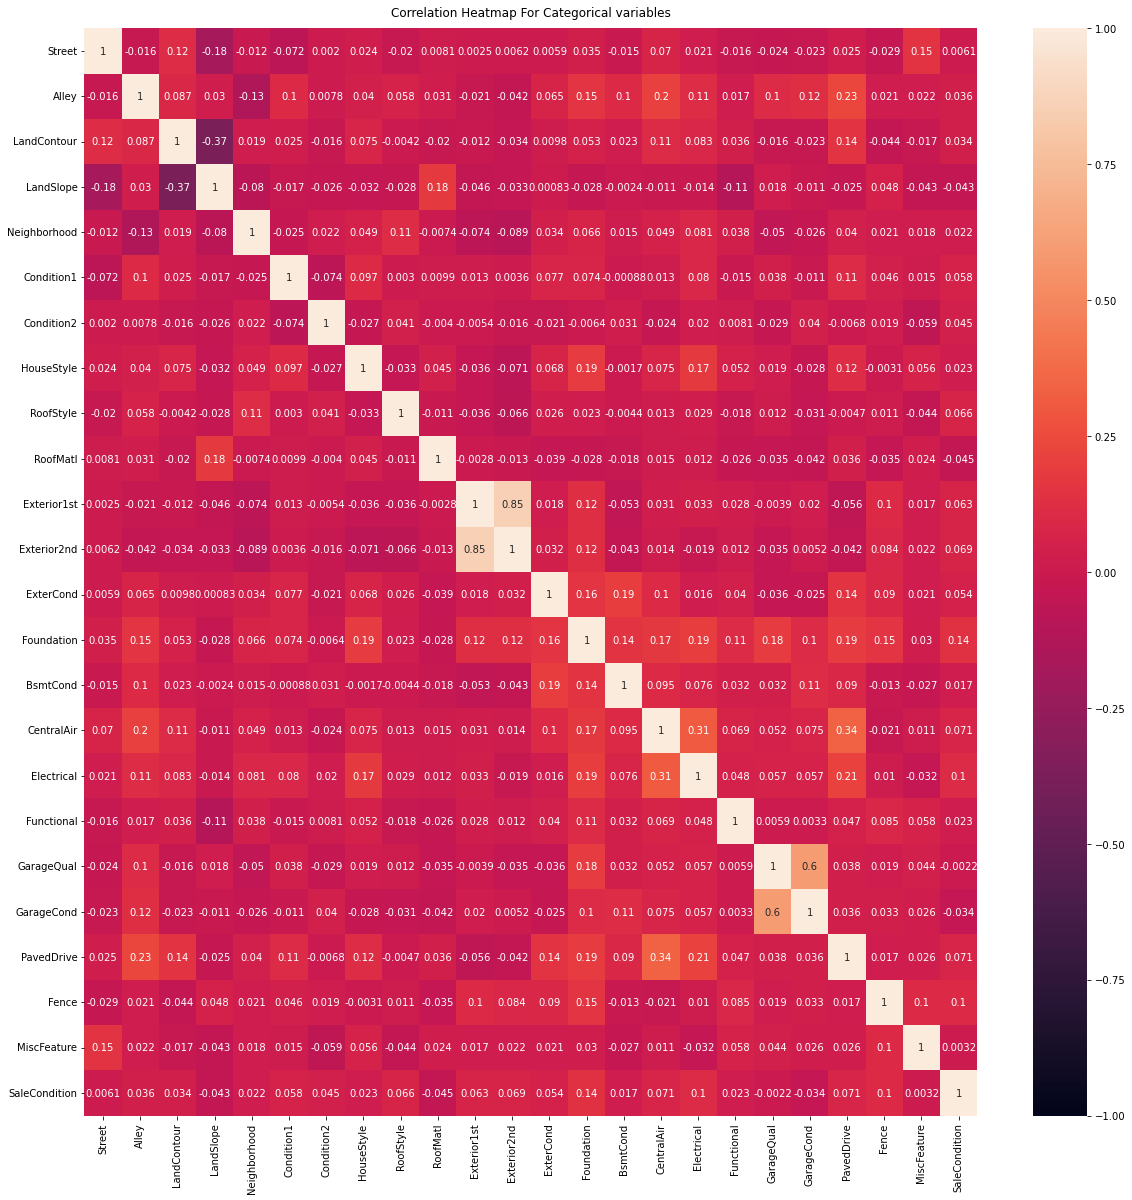

In [27]:
# we shall take only categorical df and see what happens or how they are correated
plt.figure(figsize=(20,20))

cat_cols_set = set(cat_cols)
category_name_Arr = []
for x in df.columns:
    if x in cat_cols_set:
        category_name_Arr.append(x)
new_df = df[category_name_Arr ]

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap For Categorical variables', fontdict={'fontsize':12}, pad=12);

In [28]:
len(df.columns)

52

* We started with 81 columns and dropped down to 52, I guess we have lot of columns which doesn't impact the sale  prices of our columns

In [29]:
df.columns

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LandContour', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'Fence', 'MiscFeature', 'MoSold', 'SaleCondition',
       'SalePrice'],
      dtype='object')

Text(0.5, 0, 'GrLivArea (Above ground living area square feet)')

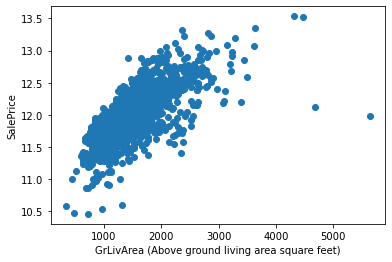

In [30]:
plt.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea (Above ground living area square feet)')
# we can see some outliers after around 4500 sq feet, so we can remove those data points inorder to make our model more accurate

Text(0.5, 0, 'GarageArea')

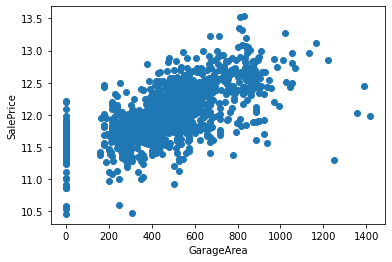

In [31]:
plt.scatter(x = df['GarageArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')

Text(0.5, 0, 'Neighborhood')

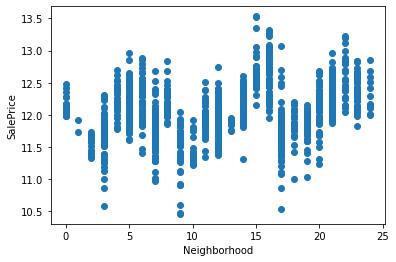

In [32]:
plt.scatter(x = df['Neighborhood'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('Neighborhood')

Text(0.5, 0, 'TotalBsmtSF')

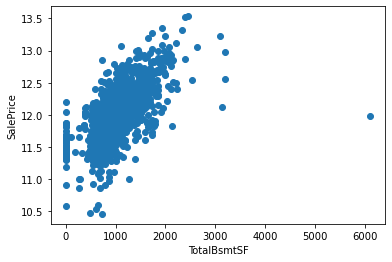

In [33]:
plt.scatter(x = df['TotalBsmtSF'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')

### pre-processing and removing outlier from above graphs

In [34]:
df = df[df['GrLivArea'] < 4500]
df = df[df['GarageArea'] < 1200]
df = df[df['TotalBsmtSF'] < 3000]

In [35]:
# removing the columns which have more than 50% of null values 
df_percentage = df.isnull().sum() / df.shape[0]
print (df_percentage[df_percentage > 0.50])
df = df.drop(df_percentage[df_percentage > 0.50].index, axis = 1)

Series([], dtype: float64)


In [36]:
df.isnull().sum()

LotFrontage      0
LotArea          0
Street           0
Alley            0
LandContour      0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterCond        0
Foundation       0
BsmtCond         0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
Fence            0
MiscFeature      0
MoSold           0
SaleCondition    0
SalePrice        0
dtype: int64

#### Wow!! we don't have any null values.
<br>

<center>
<img src="ipynb.images/wow.gif" width=800 />
</center>
<br>

In [37]:
# skewness treatement
df.skew()

LotFrontage       0.009303
LotArea          12.624353
Street          -16.964621
Alley            -4.154985
LandContour      -3.195695
LandSlope         4.834592
Neighborhood      0.043388
Condition1        3.037980
Condition2       14.235221
HouseStyle        0.302795
OverallQual       0.191714
YearBuilt        -0.611125
YearRemodAdd     -0.499709
RoofStyle         1.495919
RoofMatl          8.110566
Exterior1st      -0.729488
Exterior2nd      -0.696456
MasVnrArea        2.709307
ExterCond        -2.565029
Foundation        0.098695
BsmtCond         -3.043897
BsmtFinSF1        0.759642
BsmtFinSF2        4.292427
BsmtUnfSF         0.907480
TotalBsmtSF       0.283505
CentralAir       -3.517003
Electrical       -3.046833
1stFlrSF          0.797607
2ndFlrSF          0.805641
GrLivArea         1.010314
BsmtFullBath      0.597678
FullBath          0.027060
HalfBath          0.675560
BedroomAbvGr      0.210915
TotRmsAbvGrd      0.663709
Functional       -4.070207
Fireplaces        0.637013
G

In [38]:
# apply log transformation to reduce skewness over .75 by taking log(feature + 1)
skewed_df = df.apply(lambda x: skew(x.dropna()))
skewed_df = skewed_df[skewed_df > .75]
df[skewed_df.index] = np.log1p(df[skewed_df.index])

### Verifying our hypothesis
* Considering only our intended variables, we can train model based on them and see that whether we are able to predict the sale price of houses

In [39]:
# splitting into train and test split
x1 = df[['GrLivArea','GarageArea','TotalBsmtSF','Neighborhood']]
y1 = df['SalePrice']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [40]:
# picking out linear regression model and fitting data to it
lr2 = linear_model.LinearRegression()
lin_model2 = lr2.fit(x_train1, y_train1)

In [41]:
# making new yPredictions for x_test1
yPred1 = lin_model2.predict(x_test1)

In [42]:
lin_model2.score(x_test1,y_test1)

0.7529952948354711

Text(0.5, 1.0, 'Linear Regression Model')

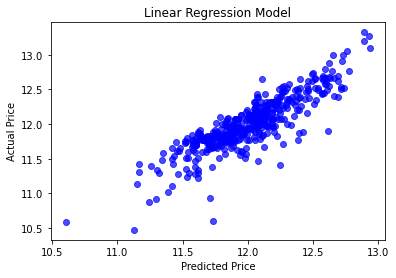

In [43]:
plt.scatter(yPred1, y_test1, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

### Performance Metrics

#### MSE (MEAN - SQUARED ERROR)
The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative sign

#### MAE (MEAN - ABSOLUTE ERROR)
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

#### RMSE (ROOT MEAN SQUARED ERROR)
RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation

###### Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. 

In [44]:
print ('MAE is:', mean_absolute_error(y_test1, yPred1))
print ('MSE is:', mean_squared_error(y_test1, yPred1))
print ('RMSE is:', sqrt(mean_squared_error(y_test1, yPred1)))

MAE is: 0.1439477758938969
MSE is: 0.03831222696579391
RMSE is: 0.19573509385338622


In [45]:
# merging the data with predicted y values
x_test1['SalePrice'] = yPred1
x_test1

,GrLivArea,GarageArea,TotalBsmtSF,Neighborhood,SalePrice
542,7.427144,583,1650,14,12.359829
759,7.836765,752,1318,15,12.591776
49,6.862758,386,955,19,11.716032
1456,7.637234,500,1542,14,12.404568
141,7.458763,660,1734,5,12.443515
...,...,...,...,...,...
135,7.428333,530,1304,14,12.227894
1186,7.438384,420,978,17,12.076622
1452,6.978214,525,547,7,11.734428
1141,7.533159,484,780,14,12.106876


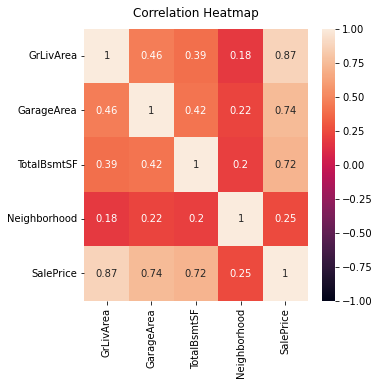

In [46]:
plt.figure(figsize=(5,5))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(x_test1.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [47]:
# checking correlation between numeric columns
corr3 = x_test1.corr()
print ('Correlation Features with SalePrice:'), print (corr3['SalePrice'].sort_values(ascending = False), '\n')

Correlation Features with SalePrice:
SalePrice       1.000000
GrLivArea       0.869045
GarageArea      0.742621
TotalBsmtSF     0.716655
Neighborhood    0.248536
Name: SalePrice, dtype: float64 



(None, None)

### This is not just any correlation, It's from our trained model on a test set
* As we can see from the above correlation from the model, the sale price seem to be more correlated or depending upon GrLivArea, GarageArea and TotalBsmtSF when compared to Neighbourhood

### How can we improve ?

#### By considering more variables 😉

In [48]:
# lets not remove every variable, so lets train the model with all the available variables
x = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [49]:
lr = linear_model.LinearRegression()
lin_model = lr.fit(x_train, y_train)

In [50]:
yPred = lin_model.predict(x_test)

In [51]:
lin_model.score(x_test,y_test)

0.8862601589197047

In [52]:
print ('MAE is:', mean_absolute_error(y_test, yPred))
print ('MSE is:', mean_squared_error(y_test, yPred))
print ('RMSE is:', sqrt(mean_squared_error(y_test, yPred)))

MAE is: 0.09405925711599168
MSE is: 0.01764187691736076
RMSE is: 0.1328227274127465


Text(0.5, 1.0, 'Linear Regression Model')

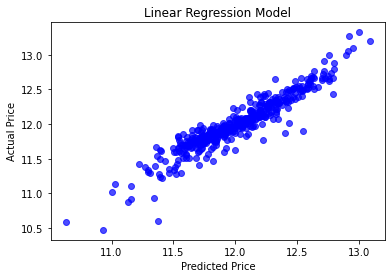

In [53]:
plt.scatter(yPred, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

<center>
<img src="ipynb.images/end.gif" width=800 />
</center>